## 什么是支撑向量机？

Support Vector Machine

![](https://i.imgur.com/PY16D92.png)

SVM的过程就是最优化上面的margin。

回忆解析几何，点$(x,y)$到直线$Ax + By + C = 0$的距离公式为：

$$\frac { | A x + B y + C | } { \sqrt { A ^ { 2 } + B ^ { 2 } } }$$

拓展到n维空间

$$\theta ^Tx_b=0 \rightarrow \,\,w^Tx+b=0$$

中：

$$\frac{|w^Ts+b|}{||w||}, ||w|| =\,\,\sqrt{\left( w_{1}^{2}+w_{2}^{2}+\cdots +w_{n}^{2} \right)}$$


$$
\begin{cases}
	\frac{w^Tx^{\left( i \right)}+b}{||w||}\geqslant d, \forall y^{\left( i \right)}=1\\
	\frac{w^Tx^{\left( i \right)}+b}{||w||}\leqslant -d, \forall y^{\left( i \right)}=-1\\
\end{cases}
\\
\begin{cases}
	\frac{w^Tx^{\left( i \right)}+b}{||w||d}\geqslant 1, \forall y^{\left( i \right)}=1\\
	\frac{w^Tx^{\left( i \right)}+b}{||w||d}\leqslant -1, \forall y^{\left( i \right)}=-1\\
\end{cases}
$$

而上式分母中的$||w||d$是一个标量，因此可以将分子中张量直接除去这个标量：

$$
\begin{cases}
	w_{d}^{T}x^{\left( i \right)}+b_d\geqslant 1, \forall y^{\left( i \right)}=1\\
	w_{d}^{T}x^{\left( i \right)}+b_d\leqslant -1, \forall y^{\left( i \right)}=-1\\
\end{cases}
$$

![](https://i.imgur.com/hpbRHHM.png)

因此SVM的优化方程就可以写为：

$$y ^ { ( i ) } ( w ^ { T } x ^ { ( i ) } + b ) \geq 1$$


![](https://i.imgur.com/7S3QU4n.png)

Soft Margin SVM和SVM的正则化

![](https://i.imgur.com/1sXnfxZ.png)

![](https://i.imgur.com/RsDacnn.png)

![](https://i.imgur.com/VTH7P9Z.png)

## sklearn中的SVM

和kNN一样，要做数据标准化处理！ 涉及距离！

![](https://i.imgur.com/maFEqWg.png)

![](https://i.imgur.com/0kofxC4.png)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [27]:
# Loading data and selecting
iris = datasets.load_iris()

X = iris['data']
y = iris['target']

# Binary classification problem
X = X[y < 2, :2]
y = y[y < 2]

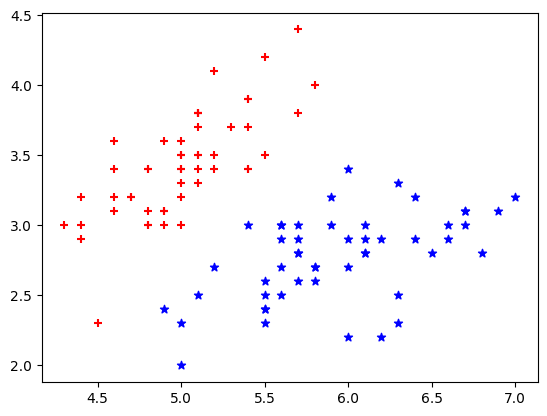

In [28]:
# plot data
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='+')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='*')
plt.show()

In [29]:
# normalized data
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X)
X_std = std_scaler.transform(X)

In [30]:
# building the SVM model, LinearSVC is the model that can use SVM model to do classification problem
from sklearn.svm import LinearSVC

svc_er_01 = LinearSVC(C=1e9)
svc_er_01.fit(X_std, y)

LinearSVC(C=1000000000.0)

C:\Users\myxc\AppData\Local\Temp\ipykernel_24204\920540423.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


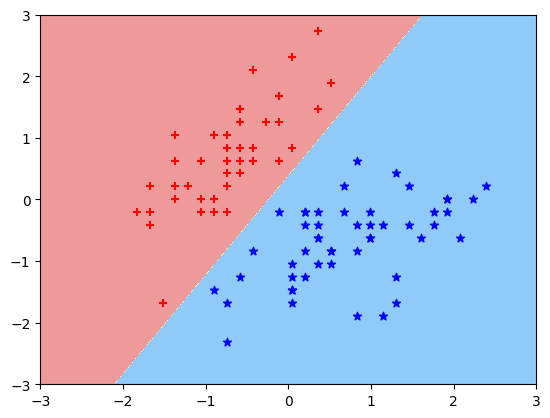

In [31]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


plot_decision_boundary(svc_er_01, axis=[-3, 3, -3, 3])
plt.scatter(X_std[y == 0, 0], X_std[y == 0, 1], color='red', marker='+')
plt.scatter(X_std[y == 1, 0], X_std[y == 1, 1], color='blue', marker='*')
plt.show()

C:\Users\myxc\AppData\Local\Temp\ipykernel_24204\920540423.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


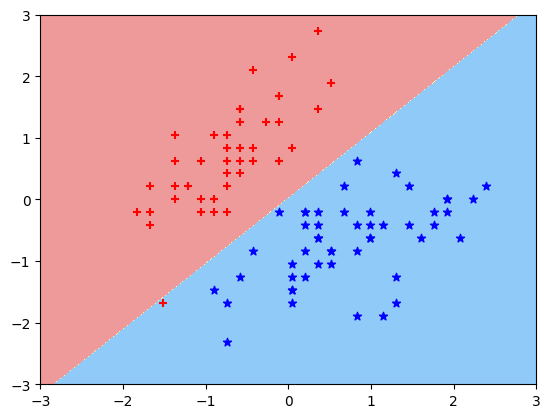

In [32]:
svc_er_02 = LinearSVC(C=0.01)
svc_er_02.fit(X_std, y)

plot_decision_boundary(svc_er_02, axis=[-3, 3, -3, 3])
plt.scatter(X_std[y == 0, 0], X_std[y == 0, 1], color='red', marker='+')
plt.scatter(X_std[y == 1, 0], X_std[y == 1, 1], color='blue', marker='*')
plt.show()

In [33]:
svc_er_02.coef_  # 分割线斜率

array([[ 0.43789621, -0.41091799]])

In [34]:
svc_er_02.intercept_  # 分割线截距

array([0.00592703])

C:\Users\myxc\AppData\Local\Temp\ipykernel_24204\4266187465.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


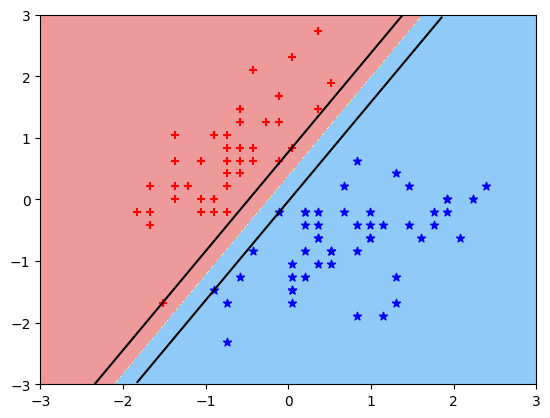

In [35]:
def plot_svc_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

    w = model.coef_[0]
    b = model.intercept_[0]
    # w0 * x0 + w1 * x1 + b = 0 ==> x1 = -w0/w1 * x0 - b/w1
    plt_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0] / w[1] * plt_x - b / w[1] + 1 / w[1]
    down_y = -w[0] / w[1] * plt_x - b / w[1] - 1 / w[1]
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plt_x[up_index], up_y[up_index], color='black')
    plt.plot(plt_x[down_index], down_y[down_index], color='black')


plot_svc_decision_boundary(svc_er_01, axis=[-3, 3, -3, 3])
plt.scatter(X_std[y == 0, 0], X_std[y == 0, 1], color='red', marker='+')
plt.scatter(X_std[y == 1, 0], X_std[y == 1, 1], color='blue', marker='*')
plt.show()
# C越大，容错空间小；C越小，容错空间大。可以看出当C=0.01时，模型就犯了一个错误，下图中有一个点被错误地分类。
# C越大，说明在优化函数中ξ的比重越高，即在进行优化的过程中，一定要保证ξ尽量的小。1-ξ表示间距，ξ越小，即分界越明显。

C:\Users\myxc\AppData\Local\Temp\ipykernel_24204\4266187465.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


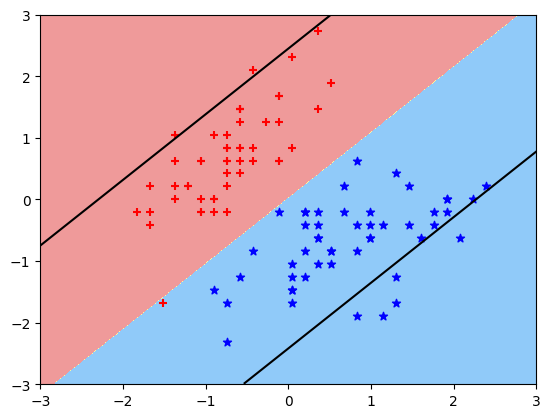

In [36]:
plot_svc_decision_boundary(svc_er_02, axis=[-3, 3, -3, 3])
plt.scatter(X_std[y == 0, 0], X_std[y == 0, 1], color='red', marker='+')
plt.scatter(X_std[y == 1, 0], X_std[y == 1, 1], color='blue', marker='*')
plt.show()
# 在svc_er_02模型中，C=0.01，说明最优化函数中ξ所占比重较小，也就是说，在优化的过程中ξ可以“适当”大一点。

## 使用多项式特征的SVM

In [47]:
# 生成随机数据集
X, y = datasets.make_moons(noise=0.1, random_state=666)
X.shape, y.shape

((100, 2), (100,))

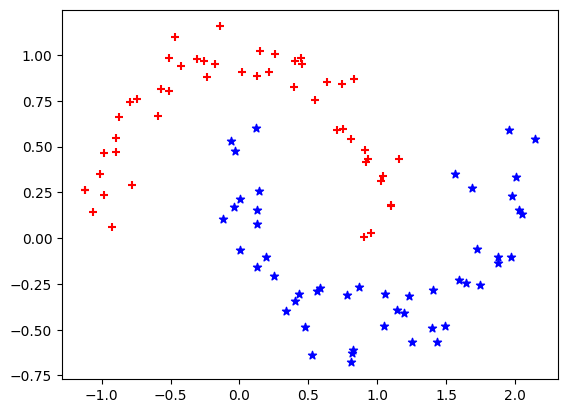

In [48]:
# Plot data
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='+')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='*')
plt.show()

In [49]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline


def make_polynomial_svc(degree, C=1.0):
    return Pipeline([
        ('ploy', PolynomialFeatures(degree=degree)),
        ('std', StandardScaler()),
        ('svc', LinearSVC(C=C))
    ])

In [51]:
svc_er_03 = make_polynomial_svc(3)
svc_er_03.fit(X, y)

Pipeline(steps=[('ploy', PolynomialFeatures(degree=3)),
                ('std', StandardScaler()), ('svc', LinearSVC())])

C:\Users\myxc\AppData\Local\Temp\ipykernel_24204\920540423.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


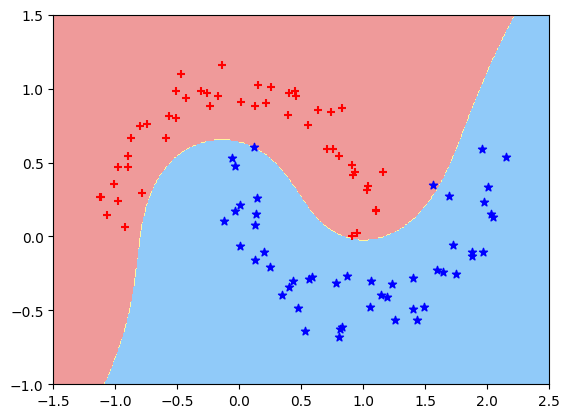

In [52]:
plot_decision_boundary(svc_er_03, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='+')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='*')
plt.show()

In [53]:
# 使用多项式核函数的SVM
from sklearn.svm import SVC


def make_polynomial_kernel_svc(degree, C=1.0):
    return Pipeline([
        ('std', StandardScaler()),
        ('kernel_svc', SVC(kernel='poly', degree=degree, C=C))
    ])

C:\Users\myxc\AppData\Local\Temp\ipykernel_24204\920540423.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


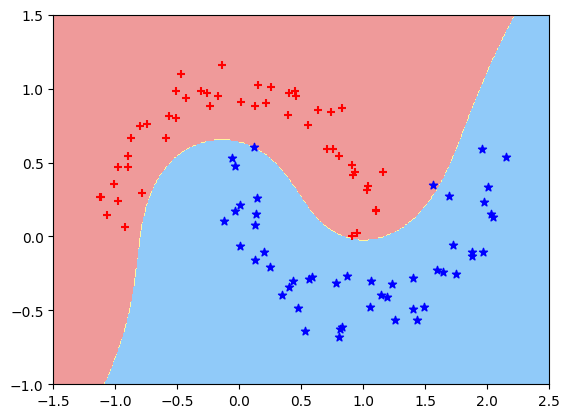

In [54]:
svc_er_04 = make_polynomial_svc(3)
svc_er_04.fit(X, y)

plot_decision_boundary(svc_er_04, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='+')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='*')
plt.show()

## 什么是核函数？

In [56]:
# 直观理解高斯核函数
x = np.arange(-4, 5, 1)
y = np.array((x >= -2) & (x <= 2), dtype='int')

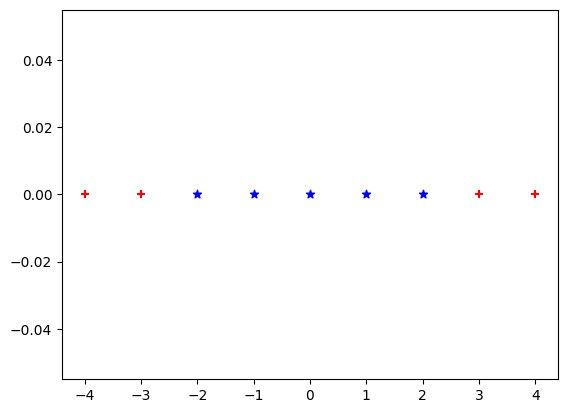

In [57]:
plt.scatter(x[y == 0], [0] * len(x[y == 0]), color='red', marker='+')
plt.scatter(x[y == 1], [0] * len(x[y == 1]), color='blue', marker='*')
plt.show()

In [65]:
def gaussian(x, l):
    gamma = 1.0
    return np.exp(-gamma * (x - l) ** 2)


l_0, l_1 = -1, 1

X_new = np.empty((len(x), 2))

for i, data in enumerate(x):
    X_new[i, 0] = gaussian(data, l_0)
    X_new[i, 1] = gaussian(data, l_1)

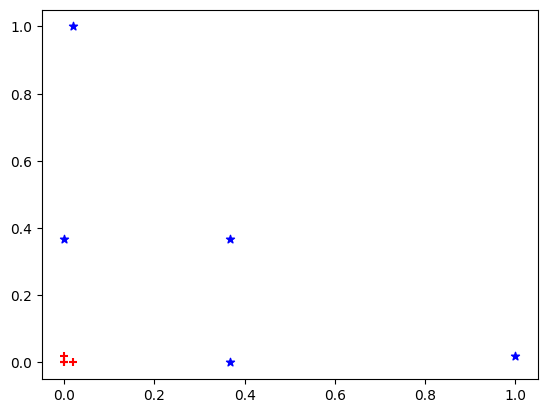

In [67]:
plt.scatter(X_new[y == 0, 0], X_new[y == 0, 1], color='red', marker='+')
plt.scatter(X_new[y == 1, 0], X_new[y == 1, 1], color='blue', marker='*')
plt.show()
# 可以看出来，原来在一维空间不可线性划分的一组数据在经过使用高斯核函数变化后，“肉眼可见”地可线性划分。

In [64]:
X_new

array([[3.67879441e-01, 3.67879441e-01],
       [1.83156389e-02, 1.00000000e+00],
       [1.23409804e-04, 3.67879441e-01],
       [1.12535175e-07, 1.83156389e-02],
       [1.38879439e-11, 1.23409804e-04],
       [2.31952283e-16, 1.12535175e-07],
       [5.24288566e-22, 1.38879439e-11],
       [1.60381089e-28, 2.31952283e-16],
       [6.63967720e-36, 5.24288566e-22]])

In [68]:
# sklearn中的高斯核函数
# 生成随机数据集
X, y = datasets.make_moons(noise=0.1, random_state=666)
X.shape, y.shape

((100, 2), (100,))

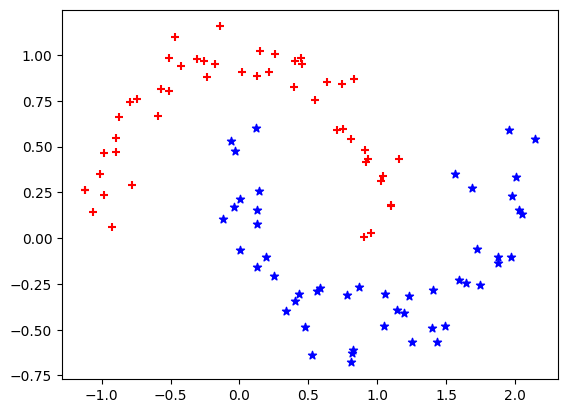

In [69]:
# Plot data
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='+')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='*')
plt.show()

In [70]:
def get_rbf_kernel_svc(gamma=1.0):
    return Pipeline([
        ('std', StandardScaler()),
        ('svc', SVC(kernel='rbf', gamma=gamma))
    ])

C:\Users\myxc\AppData\Local\Temp\ipykernel_24204\920540423.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


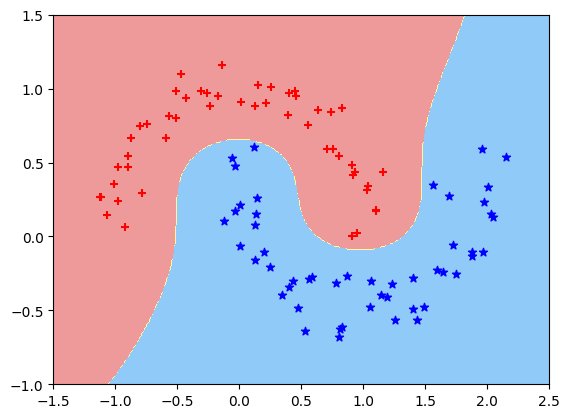

In [72]:
svc_er = get_rbf_kernel_svc()
svc_er.fit(X, y)

plot_decision_boundary(svc_er, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='+')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='*')
plt.show()

C:\Users\myxc\AppData\Local\Temp\ipykernel_24204\920540423.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


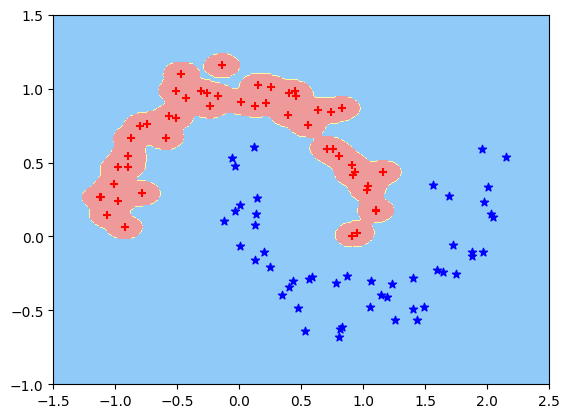

In [73]:
svc_er = get_rbf_kernel_svc(100)
svc_er.fit(X, y)

plot_decision_boundary(svc_er, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='+')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='*')
plt.show()

C:\Users\myxc\AppData\Local\Temp\ipykernel_24204\920540423.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


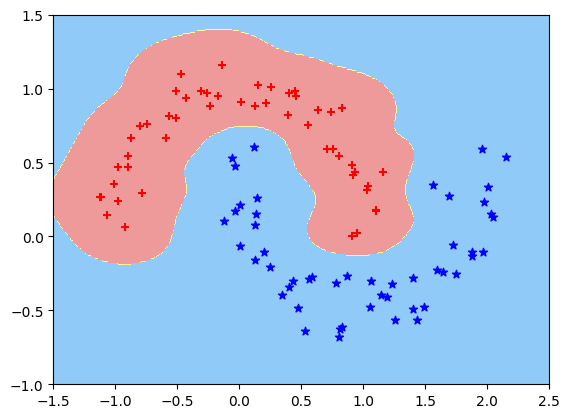

In [74]:
svc_er = get_rbf_kernel_svc(10)
svc_er.fit(X, y)

plot_decision_boundary(svc_er, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='+')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='*')
plt.show()

C:\Users\myxc\AppData\Local\Temp\ipykernel_24204\920540423.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


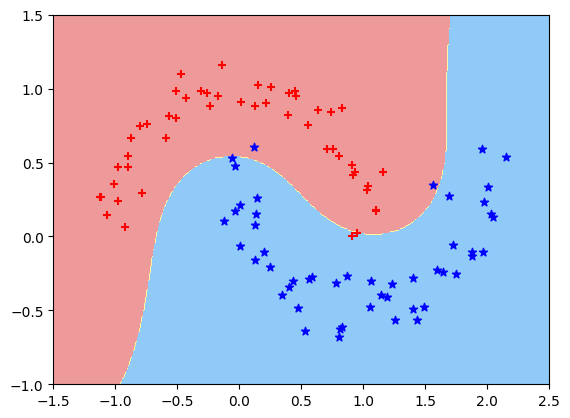

In [76]:
svc_er = get_rbf_kernel_svc(0.5)
svc_er.fit(X, y)

plot_decision_boundary(svc_er, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='+')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='*')
plt.show()

C:\Users\myxc\AppData\Local\Temp\ipykernel_24204\920540423.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


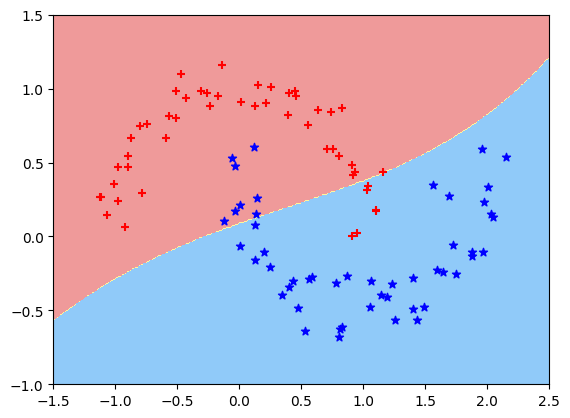

In [77]:
svc_er = get_rbf_kernel_svc(0.1)
svc_er.fit(X, y)

plot_decision_boundary(svc_er, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='+')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='*')
plt.show()
# Gamma=0.1，欠拟合，类似于线性SVR结果；Gamma相当于在调节模型复杂度，Gamma越高模型复杂度越高，越趋向于过拟合。

## SVM解决回归问题

In [78]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [80]:
X = data
y = target
X.shape, y.shape

((506, 13), (506,))

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [83]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler


def get_std_linear_svr(epsilon=0.1):
    return Pipeline([
        ('std', StandardScaler()),
        ('svr', LinearSVR(epsilon=epsilon))
    ])

In [84]:
svr_er = get_std_linear_svr()
svr_er.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('svr', LinearSVR(epsilon=0.1))])

In [85]:
svr_er.score(X_test, y_test)

0.5627695891130277